<a href="https://www.kaggle.com/code/reihanenamdari/k-nearest-neighbor?scriptVersionId=113997588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style='background:#C4F1E8; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>K-Nearest Neighbor Prediction</center></h1> 
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">


## Importing Liberaries and Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));
import warnings
warnings.filterwarnings('ignore');        

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
df= pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


## Basic explorations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## HeatMap Visualization

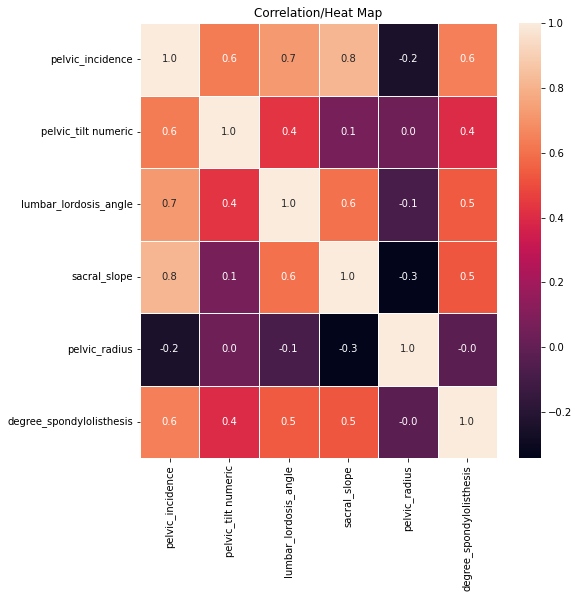

In [5]:
fig,ax=plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(),annot= True,linewidths=0.7,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation/Heat Map')
plt.show()

## Target and feature

In [6]:
x = df.drop(['class'], axis = 1)
y = df['class']

## Train and Test split

In [7]:
X_train,x_test,y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(x_test.shape)

(217, 6)
(93, 6)


## K-NN Model

#### I just put K as 5 and we will see the accuracy

In [8]:
knn= KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Let's predict

In [10]:
y_pred = knn.predict(x_test)

## Accuracy with K = 5

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
print(confusion_matrix(y_test,y_pred))

[[58 11]
 [ 8 16]]


In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Abnormal       0.88      0.84      0.86        69
      Normal       0.59      0.67      0.63        24

    accuracy                           0.80        93
   macro avg       0.74      0.75      0.74        93
weighted avg       0.80      0.80      0.80        93



## Choosing the best value for K 

In [14]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

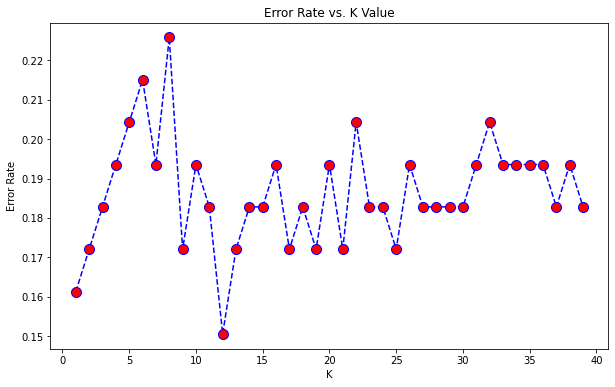

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### From the above graph we see that with the k = 12 we will have the minimmum error rate

In [16]:
knn_12 = KNeighborsClassifier(n_neighbors=12)
knn_12.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [17]:
y_pred_12 = knn_12.predict(x_test)
print(confusion_matrix(y_test,y_pred_12))
print(classification_report(y_test,y_pred_12))

[[61  8]
 [ 6 18]]
              precision    recall  f1-score   support

    Abnormal       0.91      0.88      0.90        69
      Normal       0.69      0.75      0.72        24

    accuracy                           0.85        93
   macro avg       0.80      0.82      0.81        93
weighted avg       0.85      0.85      0.85        93



### And you can see the confusion matrix for k = 12 which showing a better score.